### Perceptron đa tầng
#### 1. Vector hóa và minibatch
- Giống như trước, ta dùng ma trận X để ký hiệu một minibatch các giá trị đầu vào. Các phép tính toán dẫn đến các giá trị đầu ra của một MLP hai tầng ẩn khi đó có thể được biểu diễn như sau:
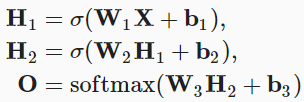
- Ta định nghĩa hàm kích hoạt phi tuyến là một phép toán áp dụng theo từng hàng, tức là lần lượt từng điểm dữ liệu một. 

In [47]:
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
npx.set_np()

#### 2. Các hàm kích hoạt
- Các hàm kích hoạt quyết định một neuron có được kích hoạt hay không bằng cách tính tổng có trọng số và cộng thêm hệ số điều chỉnh vào nó. Chúng là các toán tử khả vi và hầu hết đều biến đổi các tín hiều đầu vào thành các tín hiệu đầu ra theo một cách phi tuyến tính. 
    2.1. Hàm ReLU
        - Hàm ReLU là sự lựa chọn phổ biến do tính đơn giản khi lập trình và hiệu quả trong nhiều tác vụ dự đoán.
        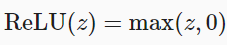
        - Lưu ý rằng hàm ReLU không khả vi tại 0, ta lấy mặc định đạo hàm trái tức là đạo hàm của hàm ReLU tại 0 thì bằng 0.

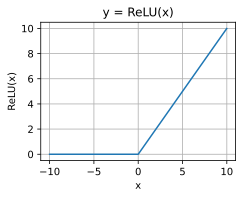

In [48]:
from matplotlib import pyplot as plt

x = np.arange(-10, 10, 0.01)
y = npx.relu(x)
x, y

plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(visible = True)
plt.title("y = ReLU(x)")
plt.plot(x, y)



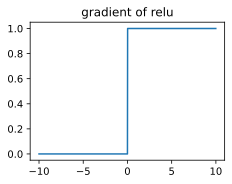

In [49]:
x.attach_grad()
with autograd.record():
    y = npx.relu(x)
y.backward()
plt.title("gradient of relu")
plt.plot(x, x.grad)

2.2 Hàm Sigmoid
- Hàm sigmoid biến đổi các giá trị đầu vào có miền giá trị thuộc R thành các giá trị đầu ra nằm trong khoảng (0, 1). Vì vậy, hàm sigmoid thường được gọi là hàm ép, ép một giá trị đầu vào bất kỳ nằm trong khoảng (-oo, +oo) thành một giá trị đàu ra nằm trong khoảng (0, 1).
- Khi phương pháp học dựa trên gradient trở nên phổ biến, hàm sigmoid là một lựa chọn tất yếu của đơn vị ngưỡng bởi tính liên tục và khả vi của nó. Hàm sigmoid vẫn là hàm kích hoạt được sử dụng rộng rãi ở các đơn vị đầu ra, khi ta muốn biểu diễn kết quả đầu ra như là xác suất.
- Tuy nhiên trong các tầng ẩn, hàm sigmoid thường bị thay thế bởi hàm ReLU do nó đơn giản và giúp cho huấn luyện dễ dàng hơn.

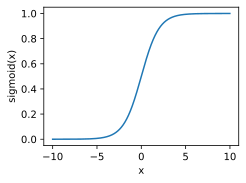

In [50]:
x.attach_grad()

with autograd.record():
    y_ = npx.sigmoid(x)

fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("sigmoid(x)")
ax.set_visible(True)
ax.plot(x, y_)

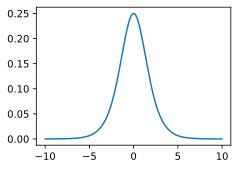

In [51]:
y_.backward()
plt.plot(x, x.grad)

#### 2.3 Hàm Tanh
- Tương tự như hàm sigmoid, hàm tanh (Hyperbolic Tangent) cũng ép các biến đầu vào và biến đổi chúng thành các phần tử nằm trong khoảng -1 và 1:
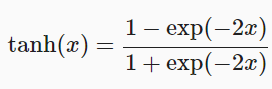

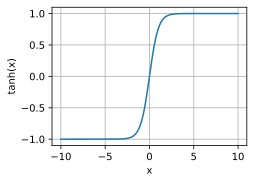

In [52]:
with autograd.record():
    y = np.tanh(x)
d2l.plot(x, y, "x", "tanh(x)")



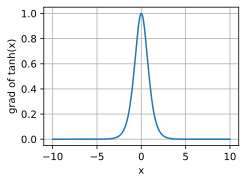

In [53]:
y.backward()
d2l.plot(x, x.grad, "x", "grad of tanh(x)")